## EDA Gym Data

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

Leer nuestros datasets

In [4]:
checkin = pd.read_csv( "GymData/checkin_checkout_history_updated.csv" )

Exploramiento basico

In [6]:
checkin.head(2)

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278


convertir de datos

In [8]:
checkin["checkin_time"]  = pd.to_datetime( checkin["checkin_time"] )
checkin["checkout_time"]  = pd.to_datetime( checkin["checkout_time"] )


In [9]:
checkin.columns

Index(['user_id', 'gym_id', 'checkin_time', 'checkout_time', 'workout_type',
       'calories_burned'],
      dtype='object')

<Axes: title={'center': 'calories_burned'}, xlabel='workout_type'>

<Figure size 800x600 with 0 Axes>

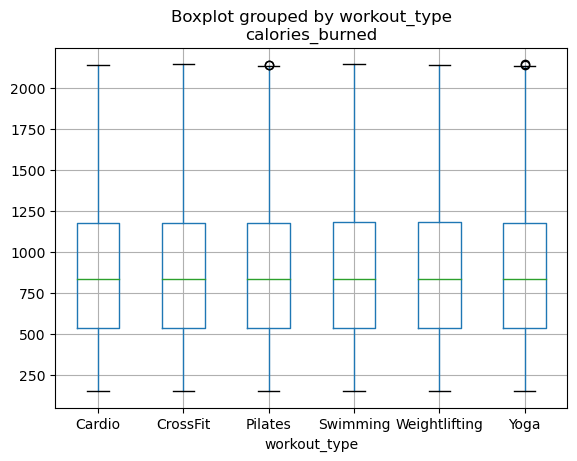

In [10]:
plt.figure( figsize=( 8, 6 ) )

checkin.boxplot( column='calories_burned'  , by="workout_type" )

In [11]:
plt.show()

In [21]:
checkin.groupby(
    "workout_type" , as_index=False
).agg({
    "calories_burned": [ "count" , "mean" , "median" ]
})

workout_type calories_burned                   
                           count        mean median
0         Cardio           49629  885.462109  834.0
1       CrossFit           49976  886.250600  836.0
2        Pilates           50035  884.525312  833.0
3       Swimming           50133  887.662119  835.0
4  Weightlifting           50306  887.135272  833.0
5           Yoga           49921  885.482022  834.0

Vamos a crear la columna workout_time

In [41]:
checkin["workout_time"] =  (checkin["checkout_time"] - checkin["checkin_time"]).dt.total_seconds() / 60 

<Axes: title={'center': 'workout_time'}, xlabel='workout_type'>

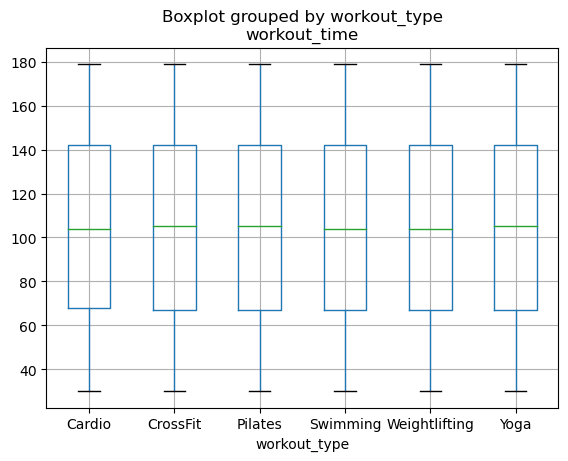

In [45]:
checkin.boxplot( column="workout_time" , by="workout_type" )

In [47]:
checkin.groupby(
    "workout_type" , as_index=False
).agg({
    "workout_time": [ "count" , "mean" , "median" ]
})

workout_type workout_time                   
                        count        mean median
0         Cardio        49629  104.577545  104.0
1       CrossFit        49976  104.548763  105.0
2        Pilates        50035  104.623224  105.0
3       Swimming        50133  104.449644  104.0
4  Weightlifting        50306  104.336779  104.0
5           Yoga        49921  104.583582  105.0

In [51]:
checkin["velocity"] = checkin["calories_burned"] / checkin["workout_time"]

<Axes: title={'center': 'velocity'}, xlabel='workout_type'>

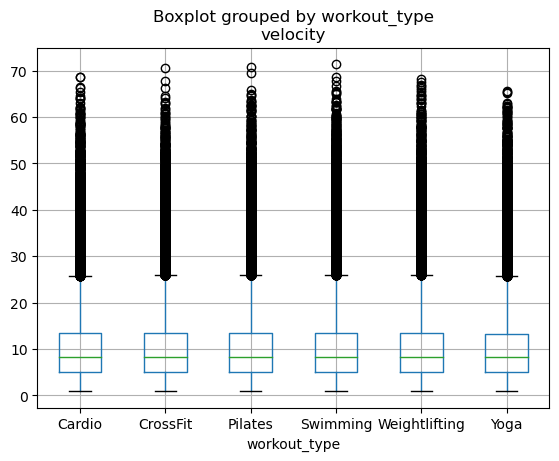

In [53]:
checkin.boxplot( column="velocity" , by="workout_type" )

In [55]:
checkin.loc[ checkin["velocity"] > 65 , : ]

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,workout_time,velocity
17673,user_927,gym_9,2023-06-08 18:01:00,2023-06-08 18:31:00,Swimming,2002,30.0,66.733333
20660,user_3019,gym_4,2023-04-03 17:24:00,2023-04-03 17:54:00,CrossFit,2115,30.0,70.500000
28320,user_3525,gym_9,2023-05-25 07:31:00,2023-05-25 08:01:00,Pilates,2086,30.0,69.533333
50546,user_2951,gym_7,2023-09-30 14:02:00,2023-09-30 14:33:00,Weightlifting,2054,31.0,66.258065
54663,user_162,gym_8,2023-03-08 20:24:00,2023-03-08 20:55:00,Swimming,2016,31.0,65.032258
58156,user_2096,gym_9,2023-01-31 15:02:00,2023-01-31 15:32:00,Cardio,1964,30.0,65.466667
60226,user_2028,gym_1,2023-04-18 16:48:00,2023-04-18 17:19:00,Yoga,2021,31.0,65.193548
65695,user_3424,gym_9,2023-08-08 12:23:00,2023-08-08 12:54:00,Weightlifting,2041,31.0,65.838710
66764,user_4770,gym_6,2023-08-29 10:34:00,2023-08-29 11:04:00,CrossFit,2033,30.0,67.766667
86847,user_2933,gym_10,2023-01-11 06:33:00,2023-01-11 07:03:00,Yoga,1968,30.0,65.600000


In [65]:
checkin.loc[ (checkin["user_id"] == "user_3019") , : ].sort_values( ["checkin_time"] )

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,workout_time,velocity
99090,user_3019,gym_2,2023-01-01 14:49:00,2023-01-01 16:15:00,Weightlifting,235,86.0,2.732558
229991,user_3019,gym_5,2023-01-08 20:00:00,2023-01-08 21:48:00,Yoga,626,108.0,5.796296
154001,user_3019,gym_8,2023-01-13 17:55:00,2023-01-13 19:16:00,Swimming,1105,81.0,13.641975
59644,user_3019,gym_4,2023-01-22 20:56:00,2023-01-22 23:46:00,Cardio,1335,170.0,7.852941
94102,user_3019,gym_3,2023-01-28 11:39:00,2023-01-28 14:06:00,Swimming,864,147.0,5.877551
3786,user_3019,gym_9,2023-02-04 14:45:00,2023-02-04 17:44:00,Yoga,1427,179.0,7.972067
251384,user_3019,gym_9,2023-02-15 06:42:00,2023-02-15 07:14:00,Yoga,523,32.0,16.343750
222655,user_3019,gym_10,2023-02-15 17:10:00,2023-02-15 19:03:00,Swimming,321,113.0,2.840708
77,user_3019,gym_6,2023-03-02 18:58:00,2023-03-02 20:48:00,Cardio,1601,110.0,14.554545
219672,user_3019,gym_10,2023-03-03 16:09:00,2023-03-03 18:56:00,Weightlifting,451,167.0,2.700599


In [71]:
checkin["rendimiento"] = pd.cut( checkin["workout_time"] , bins=3, labels=['Bajo','Moderado','Intenso'] )

In [73]:
checkin

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,workout_time,velocity,rendimiento
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,39.0,11.846154,Bajo
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278,156.0,8.192308,Intenso
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858,85.0,10.094118,Moderado
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134,170.0,6.670588,Intenso
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049,102.0,10.284314,Moderado
...,...,...,...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288,44.0,6.545455,Bajo
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935,170.0,11.382353,Intenso
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312,73.0,17.972603,Bajo
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787,57.0,13.807018,Bajo


<Axes: title={'center': 'calories_burned'}, xlabel='rendimiento'>

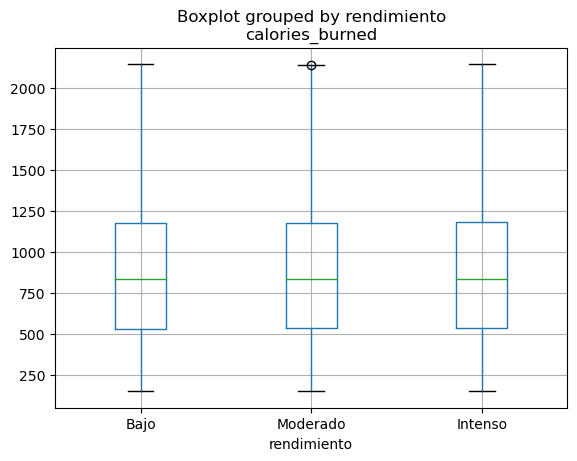

In [75]:
checkin.boxplot( column="calories_burned" , by="rendimiento" )